# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sklearn
from sklearn import impute

random.seed(42)
np.random.seed(42)

#Формируем датафрем для результатов
results = pd.DataFrame()

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

<font color='green'>
"Для фиксации метода выбора рандомных (псевдослучайных) чисел. Они используются в модулях. Например при разбиении на тренировочные и текстовые выборки. Во всех блокнотах, при перезапусках будут одни и те же разбиения,или одни и теже случайные значения""</font>
<font><br>
    (Генерация случайных чисел Python основана на предыдущем числе, поэтому использование системного времени – отличный способ гарантировать, что каждый раз, когда наша программа запускается, она генерирует разные числа. Мы можем использовать функцию random seed() для установки начального значения.)
    </font>

# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [2]:
#Считываем данные
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [26]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [27]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [28]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [29]:
df_test.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [30]:
df_train.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [3]:
#Формируем датасет False True(пропущенное значение)
missval_df_train = df_train.isnull()

In [4]:
for column in missval_df_train.columns.values.tolist():
    print(column)
    print(missval_df_train[column].value_counts(),'\n')

name
False    6999
Name: name, dtype: int64 

year
False    6999
Name: year, dtype: int64 

selling_price
False    6999
Name: selling_price, dtype: int64 

km_driven
False    6999
Name: km_driven, dtype: int64 

fuel
False    6999
Name: fuel, dtype: int64 

seller_type
False    6999
Name: seller_type, dtype: int64 

transmission
False    6999
Name: transmission, dtype: int64 

owner
False    6999
Name: owner, dtype: int64 

mileage
False    6797
True      202
Name: mileage, dtype: int64 

engine
False    6797
True      202
Name: engine, dtype: int64 

max_power
False    6803
True      196
Name: max_power, dtype: int64 

torque
False    6796
True      203
Name: torque, dtype: int64 

seats
False    6797
True      202
Name: seats, dtype: int64 



<font color='green'>В колонке mileage; engine; max_power; torque; seats присутствуют пропущенные значения </font>

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [5]:
len(df_train[df_train.duplicated(subset=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats','torque'])])

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [6]:
df_train[df_train.duplicated(subset=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats','torque'])]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [7]:
df_train = df_train.drop_duplicates(subset=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats','torque'])

In [8]:
df_train.shape

(5840, 13)

In [9]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [10]:
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [11]:
#Формируем списки для работы
m_mileage = []
m_engine = []
m_max_power = []
t_mileage = []
t_engine = []
t_max_power = []

#Работаем с mileage
'''Делаю срезы по каждой строчке , срез сохраняю в новый список'''
df_train['mileage'].apply(lambda x: m_mileage.append(float((x[0:4]))) if type(x)==str else m_mileage.append(x))
df_test['mileage'].apply(lambda x: t_mileage.append(float((x[0:4]))) if type(x)==str else t_mileage.append(x))

#Работаем с engine
'''Делаю срезы по каждой строчке , срез сохраняю в новый список'''
df_train['engine'].apply(lambda x: m_engine.append(float((x[0:4]))) if type(x)==str else m_engine.append(x))
df_test['engine'].apply(lambda x: t_engine.append(float((x[0:4]))) if type(x)==str else t_engine.append(x))

#Работаем с max_power
'''Делаю срезы по каждой строчке , срез сохраняю в новый список'''
df_train['max_power'].apply(lambda x: m_max_power.append((x[-5::-1])[::-1]) if type(x)==str else m_max_power.append(x))
df_test['max_power'].apply(lambda x: t_max_power.append((x[-5::-1])[::-1]) if type(x)==str else t_max_power.append(x))


#В max_power были пустые строки, от которых нельзя взять срез и я сделал так (для trein)
max_power = []
for i in m_max_power:
    if i == '':
        max_power.append(None)
    elif type(i) == str:
        max_power.append(float(i))
    else:
        max_power.append(i)

#В max_power были пустые строки, от которых нельзя было взять срез и я сделал так (для test)
max_powert = []
for i in t_max_power:
    if i == '':
        max_powetr.append(None)
    elif type(i) == str:
        max_powert.append(float(i))
    else:
        max_powert.append(i)
        
#Добавляем в датафреймы новые столбцы с откорректированными данными
df_train['m_mileage'] = m_mileage
df_train['m_engine'] = m_engine
df_train['m_max_power'] = max_power
df_test['t_mileage'] = t_mileage
df_test['t_engine'] = t_engine
df_test['t_max_power'] = max_powert

#Удаляем старые столбцы
df_train = df_train.drop(['mileage','engine','max_power','torque'], axis=1)
df_test = df_test.drop(['mileage','engine','max_power','torque'], axis=1)

#Переименовываем новые столбцы
df_train.rename(columns = {'m_mileage':'mileage', 'm_engine':'engine', 'm_max_power':'max_power'}, inplace = True )
df_test.rename(columns = {'t_mileage':'mileage', 't_engine':'engine', 't_max_power':'max_power'}, inplace = True )

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [12]:
import sklearn
from sklearn import impute

# для удобства работы с нашим датасетом создаем маску, указывающую на столбцы с категориальными признаками
cat_features_mask = (df_train.dtypes == "object").values # категориальные признаки имеют тип "object"

'''Работаем с тренировочной выборкой'''
# для вещественнозначных признаков заполним пропуски средними
X_real = df_train[df_train.columns[~cat_features_mask]]
mis_replacer = impute.SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)

# для категориальных - пустыми строками
X_cat = df_train[df_train.columns[cat_features_mask]].fillna("")
X_cat.reset_index(drop=True, inplace=True)

df_train = pd.concat([X_no_mis_real, X_cat], axis=1)

'''Работаем с тестовой выборкой'''
# для удобства работы с нашим датасетом создаем маску, указывающую на столбцы с категориальными признаками
cat_features_mask1 = (df_test.dtypes == "object").values # категориальные признаки имеют тип "object"

# для вещественнозначных признаков заполним пропуски средними
X_real = df_test[df_test.columns[~cat_features_mask1]]
mis_replacer = impute.SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)

# для категориальных - пустыми строками
X_cat = df_test[df_test.columns[cat_features_mask1]].fillna("")
X_cat.reset_index(drop=True, inplace=True)

df_test = pd.concat([X_no_mis_real, X_cat], axis=1)

In [13]:
'''Проверяем остались ли пропуски (как в начале)'''
#Формируем датасет False True(пропущенное значение)
missval_df_train = df_train.isnull()
for column in missval_df_train.columns.values.tolist():
    print(column)
    print(missval_df_train[column].value_counts(),'\n')

year
False    5840
Name: year, dtype: int64 

selling_price
False    5840
Name: selling_price, dtype: int64 

km_driven
False    5840
Name: km_driven, dtype: int64 

seats
False    5840
Name: seats, dtype: int64 

mileage
False    5840
Name: mileage, dtype: int64 

engine
False    5840
Name: engine, dtype: int64 

max_power
False    5840
Name: max_power, dtype: int64 

name
False    5840
Name: name, dtype: int64 

fuel
False    5840
Name: fuel, dtype: int64 

seller_type
False    5840
Name: seller_type, dtype: int64 

transmission
False    5840
Name: transmission, dtype: int64 

owner
False    5840
Name: owner, dtype: int64 




(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [14]:
print("<При преобразовании seats к целочисленому признаку, 'вес' признака кол-во сидений станет не информативным, т.к. будет зависимость умножать ли 1000* 2 места или 1000* 8 мест. ЛУчше применить One hot encoding>")

<При преобразовании seats к целочисленому признаку, 'вес' признака кол-во сидений станет не информативным, т.к. будет зависимость умножать ли 1000* 2 места или 1000* 8 мест. ЛУчше применить One hot encoding>


In [15]:
def integer(number):
    return int(number)
#Перебираем все значения в указанных стоолбцах - меняя тип
df_train['engine'] = df_train.engine.apply(integer)
df_test['engine'] = df_test.engine.apply(integer)

df_train['seats'] = df_train.seats.apply(integer)
df_test['seats'] = df_test.seats.apply(integer)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

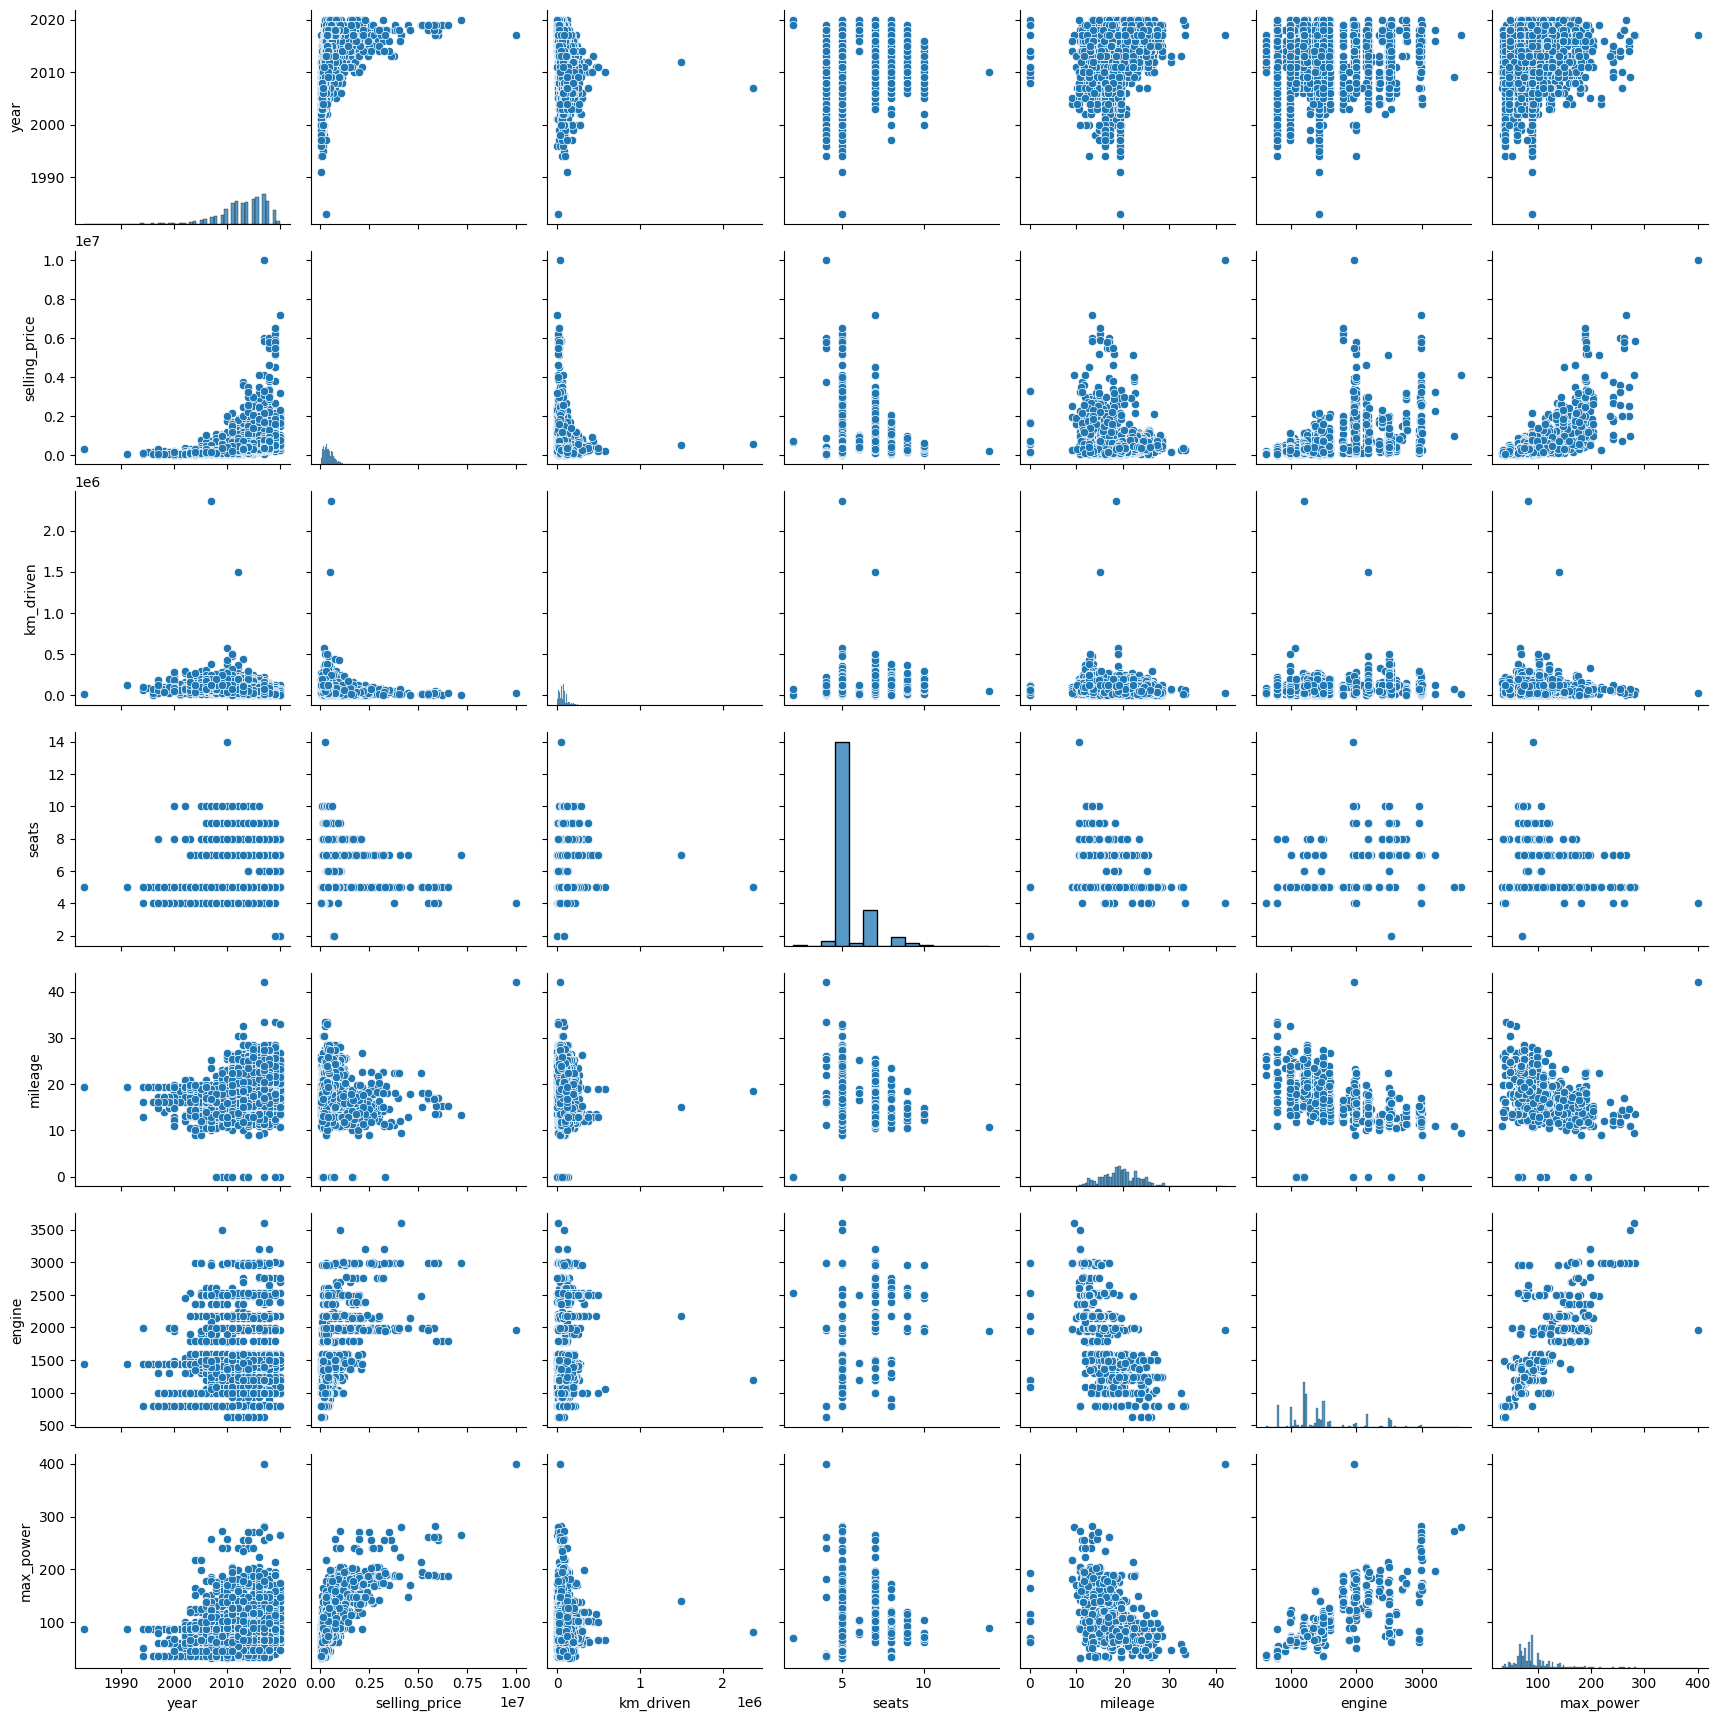

In [85]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

<font color='green'>
Selling Price - Year 'Чем старше год выпуска машинs - тем дешевле она'.<br>
Selling Price - Km Driver 'Чем меньше пробег - тем дороже машина'.<br> 
Selling Price - seats ' На мишинах в выборке: при стоимосте больеше 250000 у.е. - не бывает больше 7 посадочных мест<br> 
    при стоимости машины от 5000000 у.е. зачастую посадочных мест 5 штук'.<br> 
Selling Price - max_power 'Особых зависимостей нет, но самая дорогая машина - самая мощная. От 200 до 300 л.с. машин продается немного относительно маломощных машин'<br> 
</font>
<font color='blue'>
Довольна интересная корреляция между mileage- engine. Чем больше объем двиателя , тем меньше пробег. Большой двигатель потребляет много - большой расход- выские денежные завтраты - стараешься меньше ездить.
</font>



(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

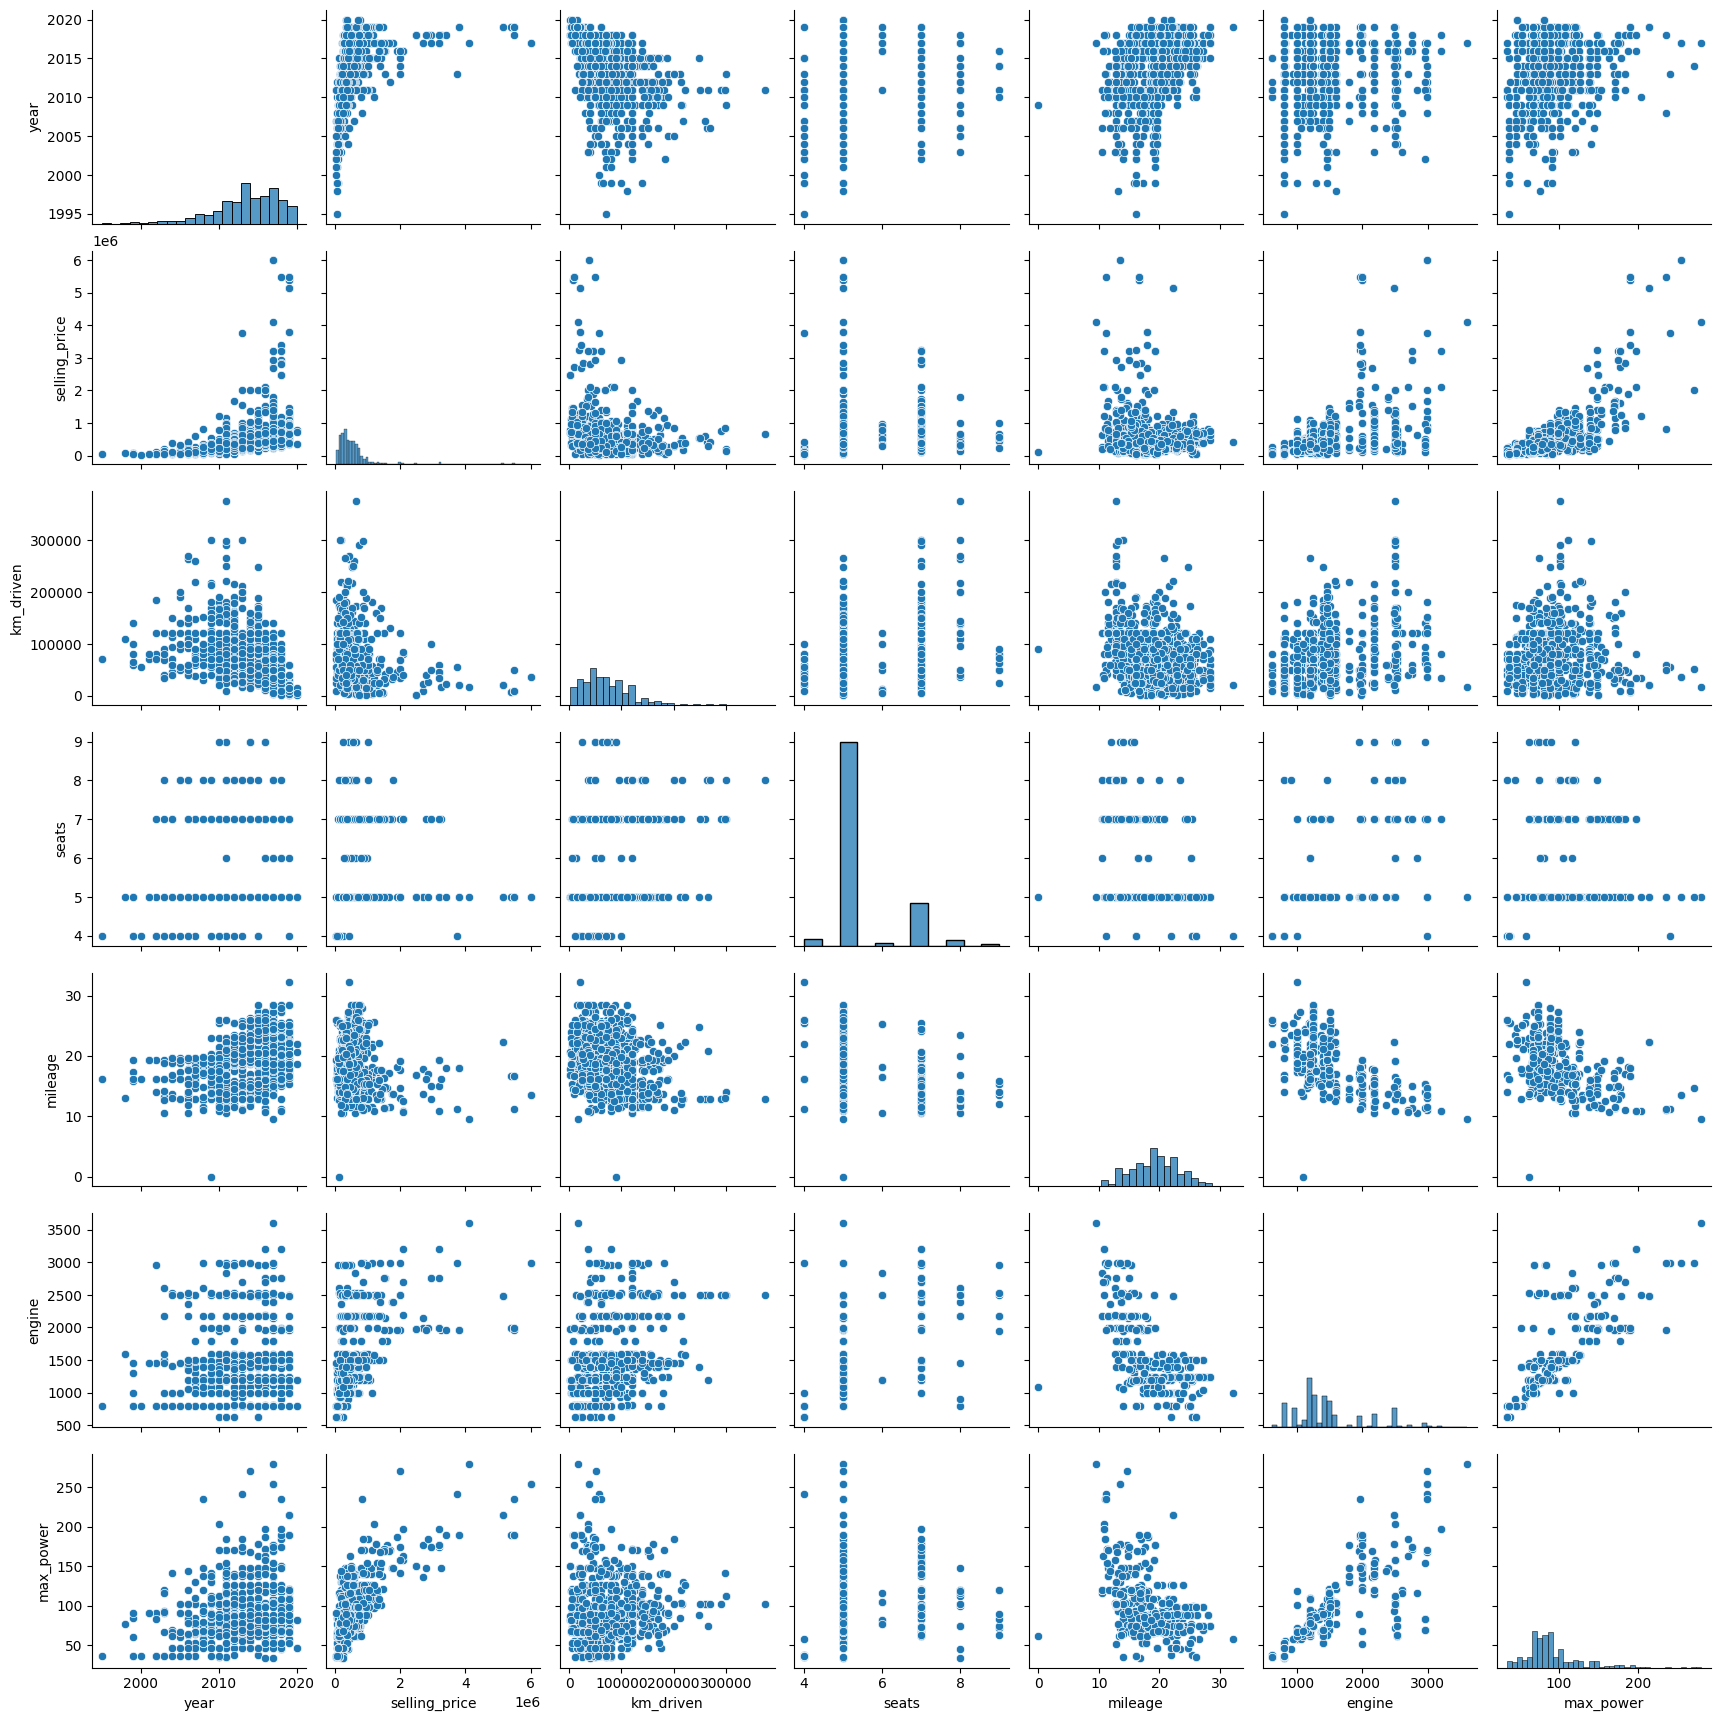

In [86]:
sns.pairplot(df_test)

<font color='green'>
Selling Price - Year График относительно аналогичен. По причине того что данных мало по сравнению с trein, мы могли бы при разведочном анализе допустить ошибку при анализе на выброы (в зоне периода 2015 до 2020).<br>
Selling Price - Km Driver 'Распределение аналогично тренировочной выболрке'.<br> 
Selling Price - seats ' Распределение аналогично тренировочной выборке'.<br> 
Selling Price - max_power 'Машин мощнее 300 л.с. нет'
</font>

"Похожими ли оказались совокупности при разделении на трейн и тест?"<br>

<font color = 'blue'>
Да похожи, за исключением нескольких данных в тренировочной таблице. Четко видно на Km-driven - engine,max_power)
</font>

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

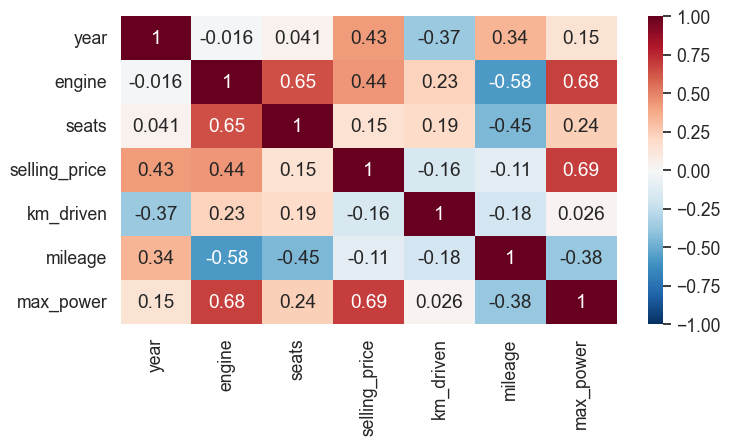

In [112]:
#Была ошибка - heatmap пытался перегнать строковый тип во флоат. Пришлось отдельно вывести числовые колонки в новый датафрейм
df = pd.DataFrame()
df['year'] = df_train.year
df['engine'] = df_train.engine
df['seats'] = df_train.seats
df['selling_price'] = df_train.selling_price
df['km_driven'] = df_train.km_driven
df['mileage'] = df_train.mileage
df['max_power'] = df_train.max_power

#Задаем корреляцию по датафрейму, строим тепловую карту
df.corr()
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),cmap='RdBu_r',annot=True,vmin=-1, vmax=1);

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
    <br>
   <font color='green'> mileage-engine; mileage-seats <br></font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
    <br>
    <font color='green'>seselling_price - max_power; engine-max_power; seats - engine <br></font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>
    <font color='green'>Да верно. (Меньше год - значит страше 2020-2019-2018). У кол-ва лет и км пробега отрицательная зависимость. Тоесть при увеличении одного , уменьшаетя другое.</font>

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

Text(0, 0.5, 'Max power')

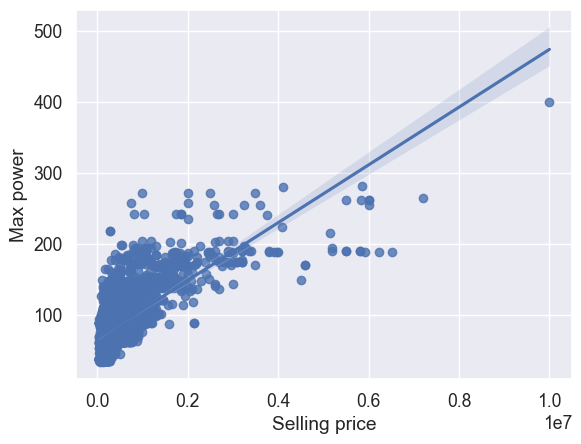

In [113]:
sns.regplot(
    x='selling_price', 
    y='max_power', 
    data=df)
plt.xlabel(
    'Selling price')
plt.ylabel(
    'Max power')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

В рамках задачи интересмо посмотреть, имеется ли связь между такими параметрами как мощность и тип топлива.

<AxesSubplot: xlabel='fuel', ylabel='engine'>

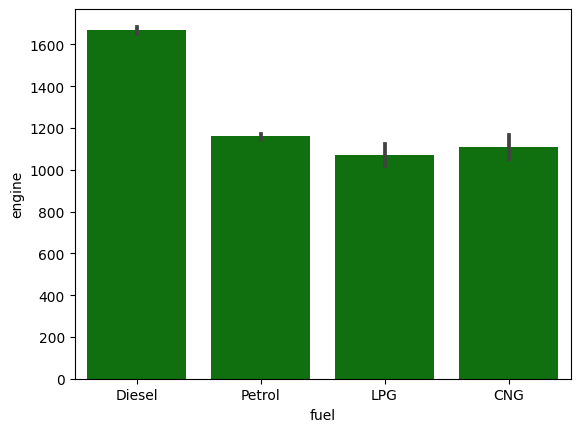

In [17]:
sns.barplot(x='fuel',y='engine',data = df_train, color = 'green')

<AxesSubplot: xlabel='fuel', ylabel='max_power'>

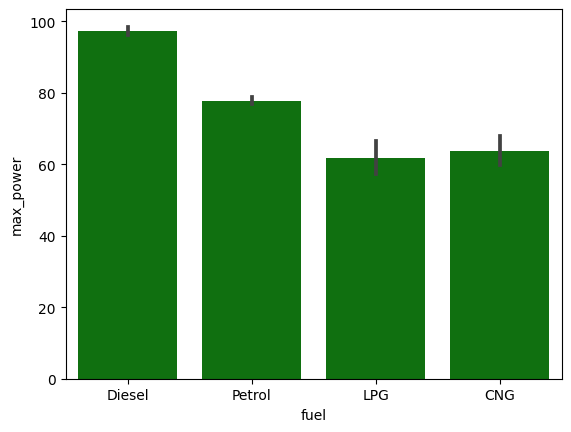

In [19]:
sns.barplot(x='fuel',y='max_power',data = df_train, color = 'green')

<font color = 'green'>На примере 2 гистрограмм, мы видим ,что есть корреляция между: максимальной мощностью, объемом и типом топлива. Для всех видом топлива кроме дизельного , распределение относительно равномерное. При OneHotEncoding-ге мы можем трансформировать категориальный признак "вид топлива"(fuel). При прочих равных наша модель будет точнее предсказывать цену именно для дизельных двигателей. </font>

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [79]:
y_train = df_train[['selling_price']].copy()
X_train = df_train[['year','km_driven','seats','mileage','engine','max_power']].copy()

In [80]:
assert X_train.shape == (5840, 6)

In [81]:
y_test = df_test[['selling_price']].copy()
X_test = df_test[['year','km_driven','seats','mileage','engine','max_power']].copy()

In [82]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

#Обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

pred_mse = model.predict(X_test)

In [22]:
r2_score(y_test, pred_mse)

0.5939705770072741

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_mse)

233397306765.61963

In [22]:
model.coef_

array([[ 3.85603399e+04, -7.18293186e-01, -2.21459536e+04,
         6.71842470e+03,  1.20804840e+02,  1.02356787e+04]])

In [23]:
from itertools import chain
results['LinearRegression (1)'] = list(chain.from_iterable(model.coef_))

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [83]:
from sklearn.preprocessing import StandardScaler

#Стнадартизируем признаки
scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(X_train)
data_test_scaled = scaler.fit_transform(X_test)

#Обучаем модель
model = LinearRegression()
model.fit(data_train_scaled, y_train)
pred_mse = model.predict(data_test_scaled)

In [26]:
r2_score(y_test, pred_mse)

0.5650906164967863

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_mse)

249998332752.75864

In [29]:
model.coef_

array([[157915.05226111, -43144.99363118, -21753.08087728,
         26767.42529568,  58530.52603044, 322994.59013935]])

In [30]:
results['LinearRegression (2) StabdartScaler'] = list(chain.from_iterable(model.coef_))

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

<font color='green'>Чем вес  больше, тем «важнее» i-й признак для итогового предсказания. (Учебник по машинному обучению ШАД),</font>
<br>
<font color='green'>Логично предположить , что наиболее информативным признаком оказалась мощность двигателя.</font>

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [86]:
from sklearn.linear_model import Lasso

#Обучаем модель с коэф.регуляризации "1"
model_l1 = Lasso(alpha=1)
model_l1.fit(data_train_scaled, y_train)

pred_l1 = model_l1.predict(data_test_scaled)

r2_score(y_test, pred_l1)

0.565089371643956

In [85]:
mean_squared_error(y_test, pred_l1)

249998691150.04968

In [37]:
model_l1.coef_

array([157914.69765084, -43143.91827424, -21750.2865175 ,  26765.70996947,
        58525.90475269, 322995.44502176])

In [39]:
results['Lasso (2)'] = model_l1.coef_

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

<font color ='green'>
    Она не занулила веса, потому что они не были маленькими. Веса отличаются лишь на 1 порядок.
    </font>

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [41]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':np.arange(0, 1.1, 0.1)}

#C помощью гридсёрча ищем оптимальный параметры alpha 
grid = GridSearchCV(Lasso(), parameters, cv=10)
grid.fit(data_train_scaled, y_train)

grid.best_params_

C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.538e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted usin

C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.242e+14, tolerance: 1.597e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate de

{'alpha': 1.0}

In [42]:
grid.score(data_test_scaled, y=y_test)

0.565089371643956

In [43]:
grid.best_estimator_.coef_

array([157914.69765084, -43143.91827424, -21750.2865175 ,  26765.70996947,
        58525.90475269, 322995.44502176])

In [44]:
results['Lasso GridSearchCV (2)'] = grid.best_estimator_.coef_

In [44]:
from sklearn.svm import LinearSVR
svm = LinearSVR()
parameters1 = {'C':range(0,10)}
grid = GridSearchCV(svm, parameters1, cv=10)
grid.fit(data_train_scaled, y_train)

grid.best_params_

C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataC

C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataC

{'C': 9}

In [45]:
grid.score(data_test_scaled, y=y_test)

-0.5527772908689059

In [46]:
grid.best_estimator_.coef_

array([1883.89948785,    6.94464672,  744.07659013,  332.98422524,
        697.9455267 ,  843.90791024])

<font color = 'green'>
   Дополнительно попробовал построить метод опорных векторов для регрессии.<br>
    Эквивалентность между альфам и параметром регуляризации SVR, "C"  -  alpha = 1 / C.<br>
    Соответсвенно рекомендует aplha = 0.111111(1) <br>
    Точность метода низка.<br>
    </font>

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color = 'green'>
    100  моделей (10 параметров, по 10 блокам)
    </font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

<font color = 'green'>
    Лучий коэффициент регуляризации alpha = 1. Нет веса не занулились.
    </font>

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [46]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet()
parametersGrid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],"l1_ratio": np.arange(0.0, 1.0, 0.1)}

grid = GridSearchCV(regr, parametersGrid, scoring='r2', cv=10)
grid.fit(data_train_scaled, y_train)

grid.best_params_

C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.539e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.190e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently 

C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.086e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.867e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently 

C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.522e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently 

C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.894e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.718e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently 

C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.179e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.750e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently 

{'alpha': 1, 'l1_ratio': 0.9}

In [47]:
grid.score(data_test_scaled, y=y_test)

0.5432654029799502

In [48]:
grid.best_estimator_.coef_

array([150367.71918306, -45381.90049445, -23323.80534374,  21352.55462148,
        77359.74990709, 281527.84839702])

In [49]:
results['ElasticNet (2)'] = grid.best_estimator_.coef_

In [50]:
from sklearn.linear_model import ElasticNet

#Обучаем модель с рекомендуемыми коэф. регуляризации
model_l3 = ElasticNet(alpha=1,l1_ratio=0.9)

model_l3.fit(data_train_scaled, y_train)

pred_l3 = model_l1.predict(data_test_scaled)

r2_score(y_test, pred_l3)

0.565089371643956

In [51]:
mean_squared_error(y_test, pred_l3)

249999048329.71307

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

<font color='green'>
    В моем случае реально улучшить модель не удалось. Если провести анализ по r2_score. То лучшее предсказание (пусть и с большой погрешность) мне обеспечила модель классической линейной регрессии r2-0.5939705770072741.
Методы регуляризации оказались неэффективны для улучшения модели (в моем случае). Возможно стоит попробовать получить лучшие результаты в GridSearch путем расширения кол-ва параметров.
    </font>

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [52]:
#Удаляем столбцы
X_test_cat = df_test.drop(['selling_price','name'], axis=1)
X_train_cat = df_train.drop(['selling_price','name'], axis=1)

In [53]:
assert X_train_cat.shape == (5840, 10)

In [54]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [55]:
#перегоняем seats обратно в строку
X_train_cat['seats'] = X_train_cat.seats.apply(str)
X_test_cat['seats'] = X_test_cat.seats.apply(str)

pd.set_option('display.max_columns', None)

#Pandas выполняет OneHot -кодирование (без удаления столбца, т.к. параметры seats отличается в каждоый выборке (в тестовой части параметров нет))
X_dum = pd.get_dummies(X_train_cat, drop_first=False)
X_dum_test = pd.get_dummies(X_test_cat, drop_first=False)
print(X_dum.shape)
print(X_dum_test.shape)

(5840, 28)
(1000, 25)


In [56]:
#Формируем недостающие столбцы для теста
seats_10 = [0]*1000
seats_2 = [0]*1000
seats_14 = [0]*1000
X_dum_test['seats_10'] = seats_10
X_dum_test['seats_2'] = seats_2
X_dum_test['seats_14'] = seats_14

#Удаляем из обоих выборок 1 столбец
X_dum_test = X_dum_test.drop(['seats_14'], axis=1)
X_dum = X_dum.drop(['seats_14'], axis=1)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


model_l1 = Ridge(alpha=7.5)

model_l1.fit(X_dum, y_train)

pred_l1 = model_l1.predict(X_dum_test)

r2_score(y_test, pred_l1)

C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.34194415761977726

In [59]:
from sklearn import datasets
from sklearn.model_selection import (cross_val_score, GridSearchCV)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score
from sklearn import tree

parameters = {'alpha':np.arange(0, 20, 0.1)}

regressor = GridSearchCV(Ridge(), parameters, scoring = 'r2', cv = 10)
regressor.fit(X_dum,y_train)

print(regressor.best_params_)
print('Best score: ', regressor.best_score_)
best = regressor.best_estimator_
print('R2: ', r2_score(y_pred = best.predict(X_dum_test), y_true = y_test))

{'alpha': 7.5}
Best score:  0.6224138791451966
R2:  0.34194415761977726


C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [65]:
results_cat_feat = pd.DataFrame()
results_cat_feat['Ridge (3) Categorical features'] = list(chain.from_iterable(regressor.best_estimator_.coef_))

Если оставить seats числовыми то качество вырастет:<br>
рекомендуемое {'alpha': 7.800000000000001}<br>
Best score:  0.6033640362231154<br>
R2:  0.6379745980634033<br>
<br>
Если преобразовать seats в категориальные то качество удалось ухудшится:<br>
рекомендуемое {'alpha': 7.5}<br>
Best score:  0.6224138791451966<br>
R2:  0.34194415761977726<br>

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [66]:
#Посчитаем объем двигателя на лошадиные силу.
list_test = []

#Работаем с тестовой выборкой
for number in range(0,1000):
    list_test.append(int(X_dum_test['engine'][number]/X_dum_test['max_power'][number]))
X_test_fin = X_dum_test
X_test_fin['Hor_Pow -volume'] = list_test

In [67]:
#Посчитаем объем двигателя на лошадиные силу.
list_train = []

#Работаем с тестовой выборкой
for number in range(0,5840):
    list_train.append(int(X_dum['engine'][number]/X_dum['max_power'][number]))
X_train_fin = X_dum
X_train_fin['Hor_Pow -volume'] = list_train

In [92]:
#При необходимости удалить старые столбцы
'''
X_train_fin = X_train_fin.drop(['engine','max_power'], axis=1)
X_test_fin = X_test_fin.drop(['engine','max_power'], axis=1)
'''

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.linear_model import Ridge
#Обучаем модель
model_fin = Ridge(alpha=7.5)
#model_fin = LinearRegression()
model_fin.fit(X_train_fin, y_train)

pred_mse_fin = model_fin.predict(X_test_fin)

C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [69]:
r2_score(y_test, pred_mse_fin)

0.516594038996216

In [70]:
mean_squared_error(y_test, pred_mse_fin)

277875550350.8193

Для линейной регрессии:<br>
с новым столбцом R2 = 0.12725087028028603 MSE = 501681121671.4925<br>
c удалением старых  R2 = -0.6332197928553267 MSE = 938821374567.1467<br>
<br>
c L2:<br>
с новым столбцом R2 = 0.516594038996216 MSE = 277875550350.8193<br>
c удалением старых R2 = -0.1425998188025459 MSE = 656799003515.0157<br>

<font color = 'green'> Существенных улучшение не наблюдается.
    </font>

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

# Моя наилучшая модель

In [71]:
X_test_best = df_test.drop(['selling_price','name'], axis=1)
X_train_best = df_train.drop(['selling_price','name'], axis=1)
X1_dum = pd.get_dummies(X_train_best, drop_first=True)
X1_dum_test = pd.get_dummies(X_test_best, drop_first=True)

model_best = Ridge(alpha=7.8)

model_best.fit(X1_dum, y_train)

pred_best = model_best.predict(X1_dum_test)
r2_score(y_test, pred_best)

0.6379745980634033

In [74]:
y_test1 = []
for i in y_test['selling_price']:
    y_test1.append(float(i))

In [75]:
def business_metrics(y_true, y_pred):
    result = [] 

    # перебираем элементы списка 
    # в пределах длины первого списка
    for i in range(len(y_true)):
        # сравниваем элементы первого списка
        # с элементами второго списка
        if y_true[i] > y_pred[i]*1.1 or y_true[i] < y_pred[i]*0.9: 
            # добавляем в итоговый список `result`
            # элемент из первого, если он меньше
            result.append(1) 
        else:
            pass
    portion = len(result) / len(y_pred)
    res = 100 - portion*100
    return res

business_metrics(y_test1,pred_best)

24.400000000000006

<font color='green'>
24 процента всех цен предсказанных моей моделью не удолветворяют заявленному отклонению.
<font>

In [78]:
#Записываем веса в файлы
results_cat_feat.to_pickle('results_cat_feat')
results.to_pickle('results')

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link